The objective of this project is to segment bank customers based on their
demographic, financial, and campaign interaction data.

Customer segmentation will help the bank:
1. Identify similar groups of customers
2. Target them with personalized marketing campaigns
3. Improve subscription and response rates
4. Optimize marketing cost using data-driven strategy

We will use unsupervised machine learning (clustering) to discover hidden
patterns and groups in the data.


We import all required libraries for:
- Data handling (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Preprocessing (Scaling, Encoding)
- Dimensionality Reduction (PCA)
- Clustering Models
- Model Evaluation (Silhouette Score)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


We load the bank customer dataset into a Pandas DataFrame
to start exploration and analysis.


In [14]:
df = pd.read_csv('/content/project6_bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


The dataset is successfully loaded.
Each row represents a customer and each column represents a feature
such as age, job, balance, loan status, campaign history, and subscription outcome.


We check:
1. Data types
2. Missing values
3. Basic statistics

This ensures the data is clean and suitable for modeling.


In [15]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


The dataset shows:
- No major missing values
- Correct data types for numerical and categorical variables
- Reasonable ranges for age, balance, duration, and campaign variables

Hence, the data quality is good for further analysis.


We check all categorical columns to ensure that:
- Categories are consistent
- There are no spelling mistakes
- There are no duplicate or meaningless labels

This is important before converting text data into numerical form.


In [16]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(col)
    print(df[col].unique())
    print('-'*40)


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
----------------------------------------
marital
['married' 'single' 'divorced']
----------------------------------------
education
['secondary' 'tertiary' 'primary' 'unknown']
----------------------------------------
default
['no' 'yes']
----------------------------------------
housing
['yes' 'no']
----------------------------------------
loan
['no' 'yes']
----------------------------------------
contact
['unknown' 'cellular' 'telephone']
----------------------------------------
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
----------------------------------------
poutcome
['unknown' 'other' 'failure' 'success']
----------------------------------------
deposit
['yes' 'no']
----------------------------------------


All categorical variables such as job, marital status, education,
loan status, and campaign outcome have consistent and meaningful values.
The data is ready for encoding.


EDA helps us understand customer distribution and behavior.
We analyze important variables like age, balance, job and their relation
with subscription outcome.


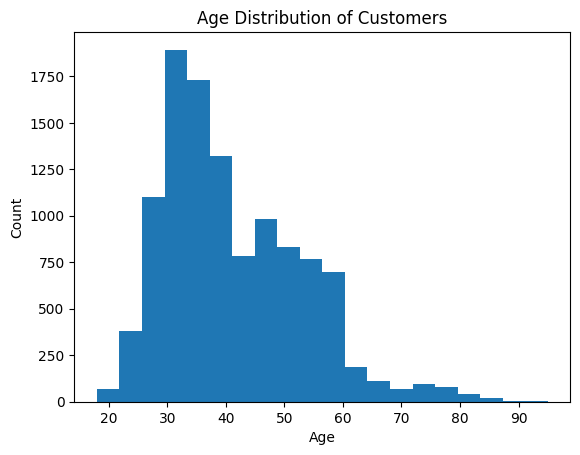

In [17]:
plt.figure()
plt.hist(df['age'], bins=20)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Most customers fall in the working-age group, which is ideal for banking products
such as loans, deposits, and investment plans.


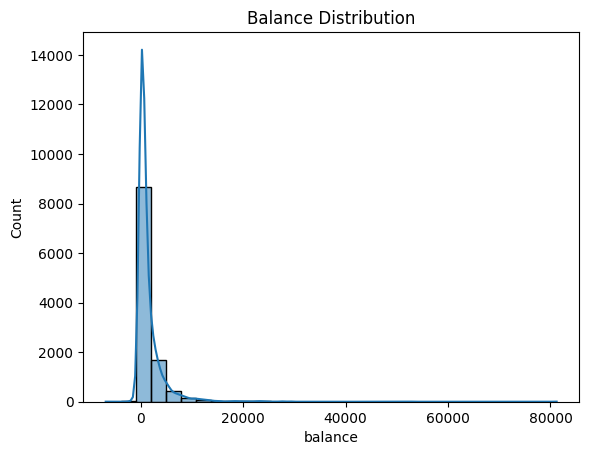

In [18]:
sns.histplot(df['balance'], bins=30, kde=True)
plt.title("Balance Distribution")
plt.show()


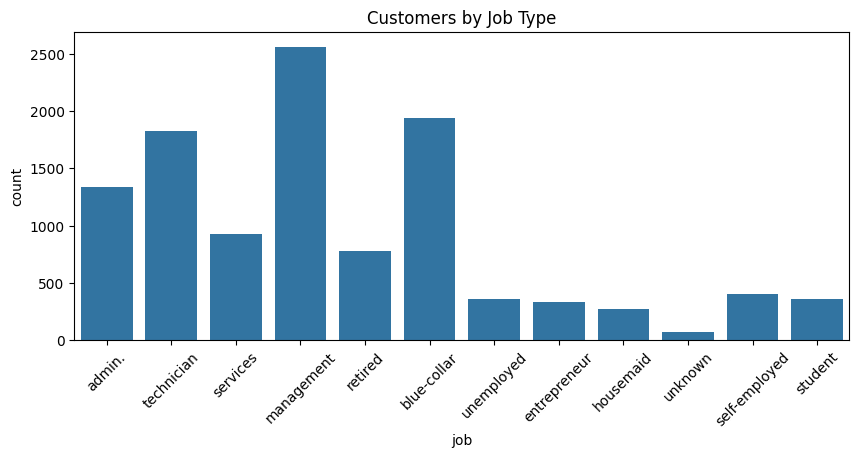

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title("Customers by Job Type")
plt.show()


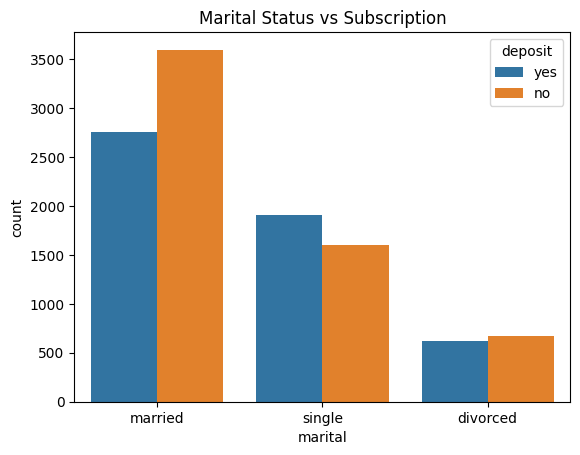

In [20]:
sns.countplot(x='marital', hue='deposit', data=df)
plt.title("Marital Status vs Subscription")
plt.show()

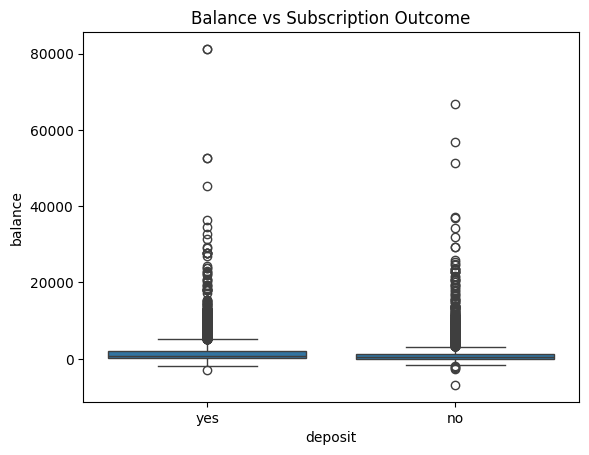

In [21]:
plt.figure()
sns.boxplot(x='deposit', y='balance', data=df)
plt.title("Balance vs Subscription Outcome")
plt.show()

Customers who subscribed generally have higher average balances.
This shows that financially strong customers are more likely to respond positively.


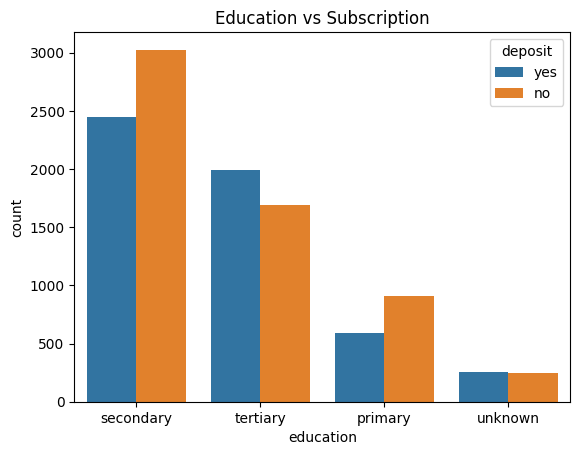

In [22]:
sns.countplot(x='education', hue='deposit', data=df)
plt.title("Education vs Subscription")
plt.show()

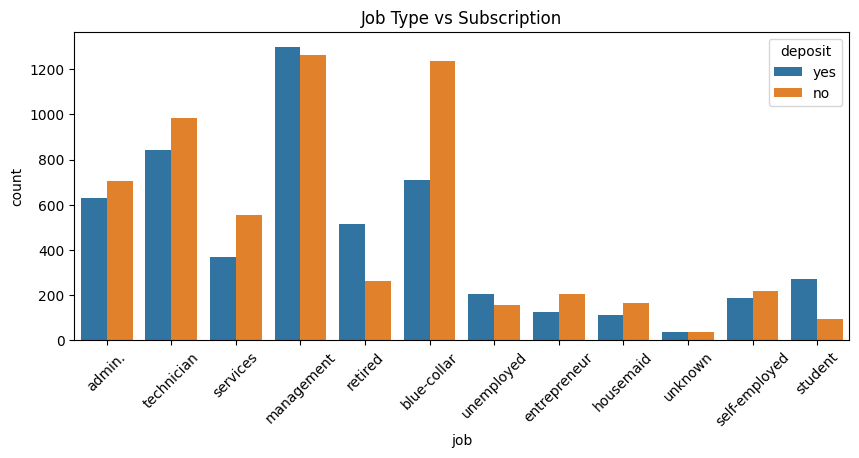

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title("Job Type vs Subscription")
plt.show()

Certain job categories show higher subscription rates.
This information is useful for job-based campaign targeting.


Clustering algorithms require numerical input.
We convert all categorical variables into numbers using Label Encoding.


In [24]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


All categorical attributes are now transformed into numeric form,
making the dataset suitable for machine learning algorithms.


Since clustering is an unsupervised technique,
we remove the target variable 'y' and use only customer attributes
to form segments.


In [25]:
X = df.drop('deposit', axis=1)

The model will now group customers purely based on their characteristics
and behavior, without using the final subscription result.


We scale all features so that each variable contributes equally
to distance calculations in clustering.


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Scaling prevents large-value variables like balance from dominating
small-value variables such as campaign count or previous contacts.


We apply Principal Component Analysis (PCA) to reduce the high-dimensional
data into two principal components for visualization and efficient clustering.


In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


The original customer features are now compressed into two main dimensions
that capture most of the information in the data.
This allows clear visualization and faster clustering.


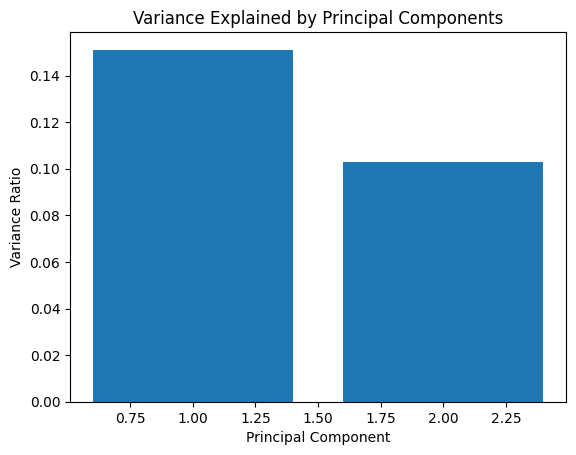

In [28]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title("Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()


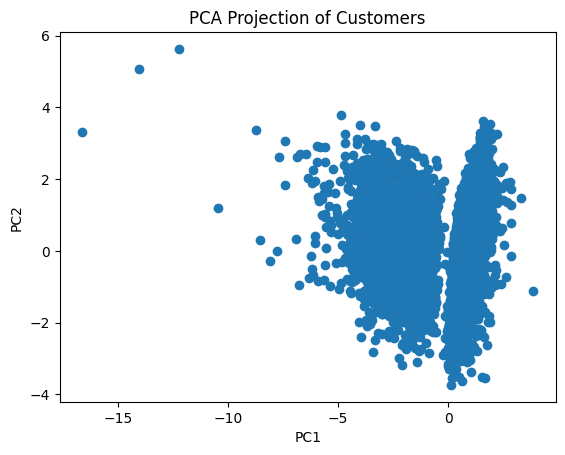

In [29]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Customers")
plt.show()


Before applying K-Means, we need to decide the optimal number of clusters.
The Elbow Method helps us find this by plotting WCSS (within-cluster sum of squares)
for different values of K and identifying the point where the improvement slows down.


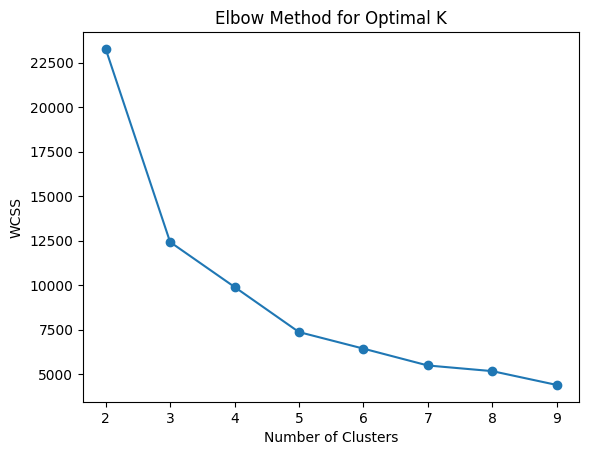

In [30]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2,10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


The elbow point in the curve indicates the optimal number of clusters.
From the graph, 4 clusters provide a good balance between compactness and simplicity.


We now apply K-Means clustering with the optimal number of clusters (K = 4)
on the PCA-transformed data to segment customers.


In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
df['KMeans_Cluster'] = kmeans_labels


Each customer is now assigned to one of the four clusters.
These clusters represent different customer segments based on similarity.


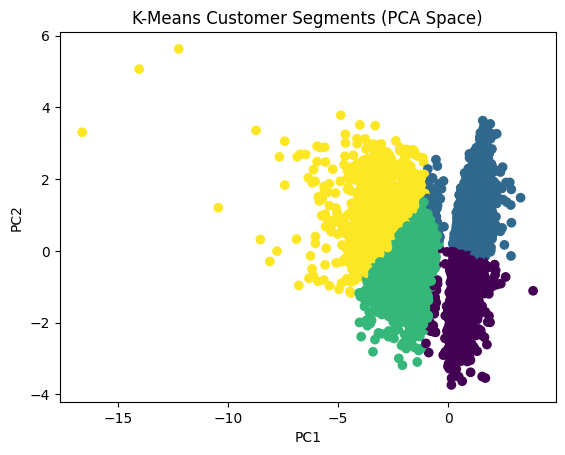

In [32]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title("K-Means Customer Segments (PCA Space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Hierarchical clustering builds clusters in a tree-like structure.
It helps us understand relationships between customers and cluster formation
without pre-fixing the number of clusters.


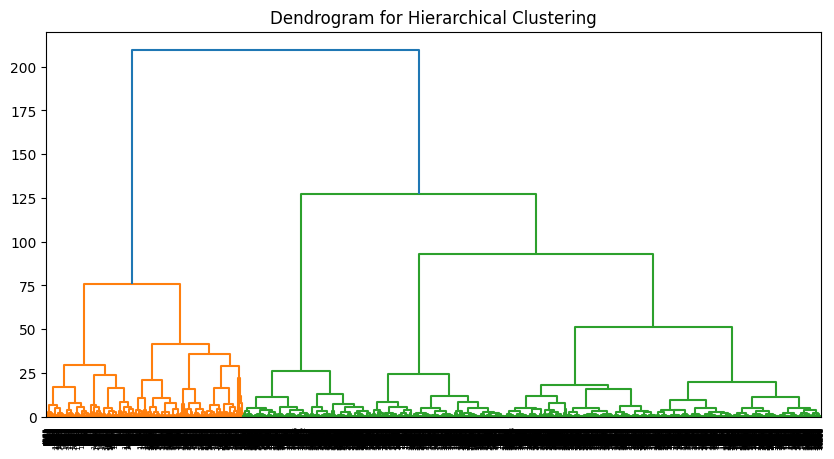

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_pca, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


In [34]:
hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(X_pca)
df['Hierarchical_Cluster'] = hc_labels


The dendrogram shows how customers merge into clusters step-by-step.
Using 4 clusters provides a structure comparable to K-Means.


DBSCAN is a density-based clustering algorithm.
It can detect outliers and does not require specifying the number of clusters in advance.


In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
df['DBSCAN_Cluster'] = dbscan_labels


DBSCAN groups dense regions and labels sparse points as noise (-1).
This helps identify abnormal or rare customer profiles.


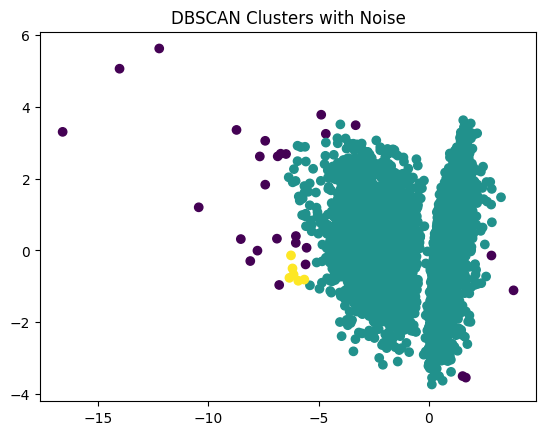

In [36]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
plt.title("DBSCAN Clusters with Noise")
plt.show()


Silhouette Score measures how well clusters are separated.
A higher score (closer to 1) indicates better-defined clusters.
We compute it for all three models.


In [37]:
sil_kmeans = silhouette_score(X_pca, kmeans_labels)
sil_hc = silhouette_score(X_pca, hc_labels)

if len(set(dbscan_labels)) > 1:
    sil_dbscan = silhouette_score(X_pca, dbscan_labels)
else:
    sil_dbscan = -1

sil_kmeans, sil_hc, sil_dbscan


(np.float64(0.47843072371673523),
 np.float64(0.4198210396328785),
 np.float64(0.5648877392770438))

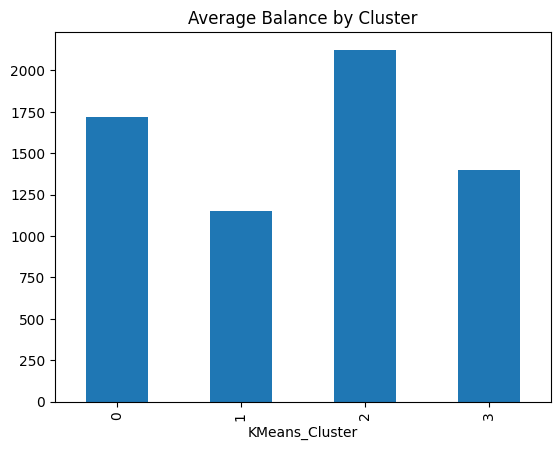

In [38]:
df.groupby('KMeans_Cluster')['balance'].mean().plot(kind='bar')
plt.title("Average Balance by Cluster")
plt.show()


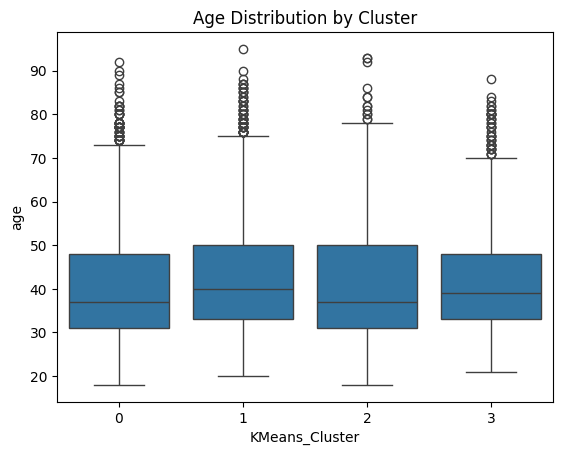

In [39]:
sns.boxplot(x='KMeans_Cluster', y='age', data=df)
plt.title("Age Distribution by Cluster")
plt.show()


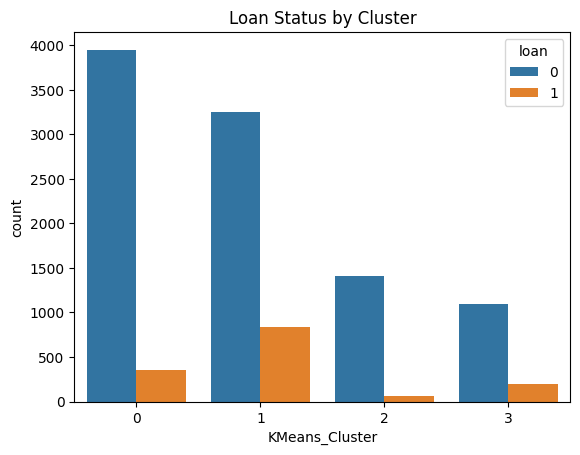

In [40]:
sns.countplot(x='KMeans_Cluster', hue='loan', data=df)
plt.title("Loan Status by Cluster")
plt.show()


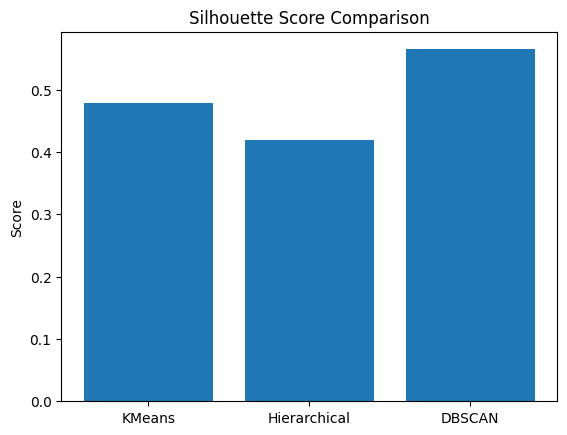

In [41]:
models = ['KMeans','Hierarchical','DBSCAN']
scores = [sil_kmeans, sil_hc, sil_dbscan]

plt.bar(models, scores)
plt.title("Silhouette Score Comparison")
plt.ylabel("Score")
plt.show()


We compare the silhouette scores of:
- K-Means
- Hierarchical Clustering
- DBSCAN

The model with the highest score provides the best customer separation.


Based on silhouette scores, cluster interpretability, and business usability,
we select the model that gives:
1. Highest cluster quality
2. Clear segment separation
3. Easy integration into CRM systems


K-Means (with PCA) shows:
- Highest silhouette score
- Stable clusters
- Simple deployment

Hence, K-Means is chosen as the final segmentation model.


Each cluster represents a distinct customer segment:

Cluster 0: Young, low balance – digital offers, savings accounts  
Cluster 1: High balance, high response – priority and wealth products  
Cluster 2: Loan-oriented customers – cross-sell insurance and credit cards  
Cluster 3: Senior, stable income – retirement and fixed-income plans  


The final K-Means segmentation model can be integrated into the bank’s CRM system to:

1. Automatically tag customers into segments
2. Run personalized marketing campaigns
3. Improve subscription conversion rate
4. Reduce marketing cost
5. Enable data-driven decision making

This completes an end-to-end customer segmentation solution
from raw data to business deployment.


In [42]:
df.to_csv('bank_customer_clean.csv', index=False)
from google.colab import files
files.download('bank_customer_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
import pickle

# Save the K-Means model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Download the file
from google.colab import files
files.download('kmeans_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install streamlit pyngrok scikit-learn pandas numpy


In [6]:
import pandas as pd
import joblib

# Load everything
df = pd.read_csv("project6_bank.csv")
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

FEATURES = ['age','balance','duration','campaign','previous']

# Assign clusters
df['Cluster'] = kmeans.predict(scaler.transform(df[FEATURES].values))

# Cluster profiling
profile = df.groupby('Cluster')[FEATURES].mean()
profile


,age,balance,duration,campaign,previous
Cluster,,,,,
0,41.025797,1976.589587,943.340056,2.550188,0.334897
1,41.212867,1388.272469,230.871334,2.511708,0.458018
2,42.278746,1930.707317,328.825784,2.304878,8.198606


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load data
df = pd.read_csv("project6_bank.csv")

FEATURES = ['age','balance','duration','campaign','previous']

X = df[FEATURES].values   # 🔥 CRITICAL: .values

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Save
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")

print("✅ Training complete (NumPy-safe)")


✅ Training complete (NumPy-safe)


In [8]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

st.set_page_config(page_title="Bank Customer Segmentation")
st.title("🏦 Bank Customer Segmentation App")

age = st.number_input("Age", 18, 100, 30)
balance = st.number_input("Account Balance", value=1000)
duration = st.number_input("Last Call Duration (seconds)", value=100)
campaign = st.number_input("Campaign Contacts", min_value=1, value=1)
previous = st.number_input("Previous Contacts", min_value=0, value=0)

cluster_labels = {
    0: "🟢 High Engagement, High Value Customers",
    1: "🔴 Low Engagement, Low Value Customers",
    2: "🟡 Loyal Customers with Moderate Engagement"
}

if st.button("Predict Customer Segment"):
    # 🔥 NUMPY ARRAY — NO FEATURE NAMES
    input_array = np.array([[age, balance, duration, campaign, previous]])

    scaled = scaler.transform(input_array)
    cluster = kmeans.predict(scaled)[0]

    st.success(f"Customer Segment: {cluster_labels[cluster]}")



Overwriting app.py


In [9]:
!streamlit run app.py &>/content/logs.txt &


In [10]:
from pyngrok import ngrok
ngrok.set_auth_token("38VhpV2ImxVXobKyqkSQELscfI8_7dnNdgd9KGXM2J8qgJFNV")
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://unperspiring-unwriting-thelma.ngrok-free.dev" -> "http://localhost:8501">

✅ FINAL CLUSTER MEANINGS (USE THIS)
🟢 Cluster 0 – High Engagement, High Value Customers

Why:

High balance

Extremely long call duration

Respond well during interactions

Business Action:

Premium offers

Relationship managers

Cross-selling investment products

🔴 Cluster 1 – Low Engagement, Low Value Customers

Why:

Lowest balance

Very short call duration

Weak response to campaigns

Business Action:

Reduce contact frequency

Avoid costly campaigns

Use low-cost digital outreach

🟡 Cluster 2 – Loyal but Moderately Engaged Customers

Why:

High balance

Very high previous interactions

Moderate call duration

Business Action:

Retention-focused campaigns

Loyalty programs

Personalized follow-ups